<a href="https://colab.research.google.com/github/20Ricky2010/IA-BestPokemonTeam/blob/main/BestPok%C3%A9monTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset pokémon; https://www.kaggle.com/datasets/terminus7/pokemon-challenge/data?select=pokemon.csv
#Dataset equipos: https://www.kaggle.com/datasets/tuannguyenvananh/pokemon-dataset-with-team-combat/data?select=pokemon_id_each_team.csv
#Dataset combates: https://www.kaggle.com/datasets/tuannguyenvananh/pokemon-dataset-with-team-combat/data?select=team_combat.csv

In [ ]:
pokemon=pd.read_csv('pokemon.csv')
teams=pd.read_csv('pokemon_id_each_team.csv')
combats=pd.read_csv('team_combat.csv')


In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:
teams.head()


,#,0,1,2,3,4,5
0,1,132,155,610,382,100,519
1,2,718,357,775,356,123,635
2,3,528,616,293,689,716,688
3,4,73,305,82,383,314,32
4,5,155,753,440,207,482,22


In [ ]:
combats.head()

,first,second,winner
0,1,1,1
1,1,2,0
2,1,3,1
3,1,4,0
4,1,5,0


In [ ]:
#normalizar:
pokemon = pokemon.drop('Generation', axis=1)
indx=pokemon.columns[4:10]
for col in indx:
    pokemon[col]=pokemon[col]/pokemon[col].max()

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,0.176471,0.257895,0.213043,0.335052,0.282609,0.250000,False
1,2,Ivysaur,Grass,Poison,0.235294,0.326316,0.273913,0.412371,0.347826,0.333333,False
2,3,Venusaur,Grass,Poison,0.313725,0.431579,0.360870,0.515464,0.434783,0.444444,False
3,4,Mega Venusaur,Grass,Poison,0.313725,0.526316,0.534783,0.628866,0.521739,0.444444,False
4,5,Charmander,Fire,NaN,0.152941,0.273684,0.186957,0.309278,0.217391,0.361111,False


In [ ]:
pokemon_df_encoded = pd.get_dummies(pokemon, columns=['Type 1', 'Type 2'])
pokemon_df_encoded['Legendary'] = pokemon['Legendary'].astype(int)

pokemon_df_encoded.head()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_Bug,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,0.176471,0.257895,0.213043,0.335052,0.282609,0.250000,0,False,...,False,False,False,False,False,True,False,False,False,False
1,2,Ivysaur,0.235294,0.326316,0.273913,0.412371,0.347826,0.333333,0,False,...,False,False,False,False,False,True,False,False,False,False
2,3,Venusaur,0.313725,0.431579,0.360870,0.515464,0.434783,0.444444,0,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Mega Venusaur,0.313725,0.526316,0.534783,0.628866,0.521739,0.444444,0,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Charmander,0.152941,0.273684,0.186957,0.309278,0.217391,0.361111,0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
equipos_df=teams.copy()
for i in range(6):  # Hay 6 Pokémon por equipo
    equipos_df = pd.merge(equipos_df, pokemon_df_encoded, how='left', left_on=str(i), right_on='#', suffixes=('', f'_P{i}'))
    equipos_df.rename(columns={'Name': f'Name_P{i}', 'Type 1': f'Type1_P{i}', 'Type 2': f'Type2_P{i}',
                                'HP': f'HP_P{i}', 'Attack': f'Attack_P{i}', 'Defense': f'Defense_P{i}',
                                'Sp. Atk': f'SpAtk_P{i}', 'Sp. Def': f'SpDef_P{i}', 'Speed': f'Speed_P{i}',
                                'Legendary': f'Legendary_P{i}'}, inplace=True)

equipos_df.head(6)

,#,0,1,2,3,4,5,#_P0,Name_P0,HP_P0,...,Type 2_Ghost_P5,Type 2_Grass_P5,Type 2_Ground_P5,Type 2_Ice_P5,Type 2_Normal_P5,Type 2_Poison_P5,Type 2_Psychic_P5,Type 2_Rock_P5,Type 2_Steel_P5,Type 2_Water_P5
0,1,132,155,610,382,100,519,132,Mr. Mime,0.156863,...,False,False,False,False,False,False,False,False,False,False
1,2,718,357,775,356,123,635,718,Genesect,0.278431,...,False,False,False,False,False,False,False,False,False,False
2,3,528,616,293,689,716,688,528,Mega Gallade,0.266667,...,False,False,False,False,False,False,False,False,False,False
3,4,73,305,82,383,314,32,73,Machop,0.274510,...,False,False,False,False,False,False,False,False,False,False
4,5,155,753,440,207,482,22,155,Mega Aerodactyl,0.313725,...,False,False,False,False,False,False,False,False,False,False
5,6,367,58,252,471,284,34,367,Mega Altaria,0.294118,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

equipos_df.to_csv('equipos.csv', index=False)


In [ ]:
# Crear nuevas características: críticos y evasión
equipos_df = equipos_df.copy()

# Agregar atributos críticos y evasión para cada Pokémon del equipo
for i in range(6):
    equipos_df[f'Critico_P{i}'] = equipos_df[f'Speed_P{i}'] * 100 / 512
    equipos_df[f'Evasion_P{i}'] = equipos_df[f'Speed_P{i}'] / equipos_df[f'HP_P{i}']

equipos_df[[f'Critico_P{i}' for i in range(6)] + [f'Evasion_P{i}' for i in range(6)]].head()

,Critico_P0,Critico_P1,Critico_P2,Critico_P3,Critico_P4,Critico_P5,Evasion_P0,Evasion_P1,Evasion_P2,Evasion_P3,Evasion_P4,Evasion_P5
0,0.097656,0.162760,0.097656,0.086806,0.086806,0.090061,3.187500,2.656250,1.821429,5.666667,3.777778,1.567778
1,0.107422,0.065104,0.043403,0.021701,0.065104,0.124783,1.975352,1.416667,1.259259,0.404762,1.307692,2.172222
2,0.119358,0.103082,0.070530,0.065104,0.097656,0.059679,2.291667,1.281746,1.534722,1.214286,1.275000,0.820175
3,0.037977,0.054253,0.037977,0.087891,0.108507,0.119358,0.708333,1.864035,0.901515,1.207895,0.944444,2.597222
4,0.162760,0.024957,0.054253,0.032552,0.048828,0.077040,2.656250,0.417735,1.106771,1.416667,1.416667,1.596561


In [ ]:
equipos_df.head(6)

,#,0,1,2,3,4,5,#_P0,Name_P0,HP_P0,...,Critico_P1,Evasion_P1,Critico_P2,Evasion_P2,Critico_P3,Evasion_P3,Critico_P4,Evasion_P4,Critico_P5,Evasion_P5
0,1,132,155,610,382,100,519,132,Mr. Mime,0.156863,...,0.162760,2.656250,0.097656,1.821429,0.086806,5.666667,0.086806,3.777778,0.090061,1.567778
1,2,718,357,775,356,123,635,718,Genesect,0.278431,...,0.065104,1.416667,0.043403,1.259259,0.021701,0.404762,0.065104,1.307692,0.124783,2.172222
2,3,528,616,293,689,716,688,528,Mega Gallade,0.266667,...,0.103082,1.281746,0.070530,1.534722,0.065104,1.214286,0.097656,1.275000,0.059679,0.820175
3,4,73,305,82,383,314,32,73,Machop,0.274510,...,0.054253,1.864035,0.037977,0.901515,0.087891,1.207895,0.108507,0.944444,0.119358,2.597222
4,5,155,753,440,207,482,22,155,Mega Aerodactyl,0.313725,...,0.024957,0.417735,0.054253,1.106771,0.032552,1.416667,0.048828,1.416667,0.077040,1.596561
5,6,367,58,252,471,284,34,367,Mega Altaria,0.294118,...,0.097656,3.187500,0.054253,0.787037,0.042318,0.497748,0.075955,0.991667,0.070530,1.227778


**CREACION** DE EQUIPOS DUMMY PARA MEJORAR LA PRECISION DEL MODELO

In [ ]:
import pandas as pd

def generar_equipos_aleatorios(pokemon_df_encoded, num_equipos=1100):
    # Lista para almacenar los equipos generados
    equipos = []

    for i in range(num_equipos):
        # Seleccionar 6 Pokémon aleatorios para el equipo
        equipo = pokemon_df_encoded.sample(n=6, random_state=None)

        # Crear un diccionario para almacenar los datos del equipo
        equipo_datos = {
            '#': i,  # Número del equipo
        }

        # Llenar el diccionario con los datos de cada Pokémon
        for j in range(6):
            pokemon_id = equipo.index[j]  # ID del Pokémon
            # Asignar IDs
            equipo_datos[j] = pokemon_id
            # Asignar nombres y estadísticas a las columnas correspondientes
            equipo_datos[f'Name_P{j}'] = equipo.iloc[j]['Name']
            equipo_datos[f'HP_P{j}'] = equipo.iloc[j]['HP']
            equipo_datos[f'Attack_P{j}'] = equipo.iloc[j]['Attack']
            equipo_datos[f'Defense_P{j}'] = equipo.iloc[j]['Defense']
            equipo_datos[f'SpAtk_P{j}'] = equipo.iloc[j]['Sp. Atk']
            equipo_datos[f'SpDef_P{j}'] = equipo.iloc[j]['Sp. Def']
            equipo_datos[f'Speed_P{j}'] = equipo.iloc[j]['Speed']
            equipo_datos[f'Legendary_P{j}'] = equipo.iloc[j]['Legendary']

            # Agregar las columnas booleanas de los tipos
            for tipo in ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
                         'Fire', 'Flying', 'Ghost', 'Grass', 'Ground',
                         'Ice', 'Normal', 'Poison', 'Psychic', 'Rock',
                         'Steel', 'Water']:
                equipo_datos[f'Type1_{tipo}_P{j}'] = equipo.iloc[j][f'Type 1_{tipo}']
                equipo_datos[f'Type2_{tipo}_P{j}'] = equipo.iloc[j][f'Type 2_{tipo}']

            # Aquí podrías agregar los cálculos de Critico y Evasion
            equipo_datos[f'Critico_P{j}'] = equipo.iloc[j]['Speed'] * 100 / 512  # Ejemplo de cálculo
            equipo_datos[f'Evasion_P{j}'] = equipo.iloc[j]['Speed'] / equipo.iloc[j]['HP']  # Ejemplo de cálculo

        # Añadir el equipo a la lista
        equipos.append(equipo_datos)

    # Convertir la lista de equipos a un DataFrame
    equipos_generados_df = pd.DataFrame(equipos)

    return equipos_generados_df

# Asumiendo que pokemon_df_encoded ya está definido y contiene los datos adecuados
equipos_generados_df = generar_equipos_aleatorios(pokemon_df_encoded, num_equipos=1100)

# Confirmación del tamaño del nuevo DataFrame de equipos
print(f"El nuevo DataFrame de equipos tiene {equipos_generados_df.shape[0]} equipos.")

# Ver los últimos 6 equipos generados para confirmar la estructura
print(equipos_generados_df.tail(6))  # Muestra los últimos 6 equipos para verificar los datos



El nuevo DataFrame de equipos tiene 1100 equipos.
         #    0       Name_P0     HP_P0  Attack_P0  Defense_P0  SpAtk_P0  \
1094  1094  685      Pawniard  0.176471   0.447368    0.304348  0.206186   
1095  1095   61        Mankey  0.156863   0.421053    0.152174  0.180412   
1096  1096  333   Mega Aggron  0.274510   0.736842    1.000000  0.309278   
1097  1097  527  Mega Gallade  0.266667   0.868421    0.413043  0.335052   
1098  1098  104       Drowzee  0.235294   0.252632    0.195652  0.221649   
1099  1099  151        Kabuto  0.117647   0.421053    0.391304  0.283505   

      SpDef_P0  Speed_P0  Legendary_P0  ...  Type1_Psychic_P5  \
1094  0.173913  0.333333             0  ...             False   
1095  0.195652  0.388889             0  ...             False   
1096  0.347826  0.277778             0  ...             False   
1097  0.500000  0.611111             0  ...             False   
1098  0.391304  0.233333             0  ...             False   
1099  0.195652  0.305556   

MUTACION DE DATASET POR CROMOSOSMAS

In [ ]:
def mutar_equipo(equipos_df):
    equipos_mutados_df = equipos_df.copy()

    # Asegurarse de que todos los nombres de columnas sean strings
    equipos_mutados_df.columns = equipos_mutados_df.columns.astype(str)

    # Identificar columnas de estadísticas numéricas
    estadisticas_columnas = [col for col in equipos_mutados_df.columns if col.startswith(('HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'))]

    for index, equipo in equipos_mutados_df.iterrows():
        for col in estadisticas_columnas:
            # Aplicar una mutación aleatoria pequeña a cada estadística
            equipo[col] = max(0, equipo[col] + np.random.randint(-5, 6))  # Limitando a valores >= 0

        # Recalcular las estadísticas derivadas
        for i in range(6):  # Iterar sobre cada Pokémon en el equipo
            speed = equipo[f'Speed_P{i}']
            hp = equipo[f'HP_P{i}']
            equipo[f'Critico_P{i}'] = speed * 100 / 512
            equipo[f'Evasion_P{i}'] = speed / hp if hp != 0 else 0

    return equipos_mutados_df

# Aplicar la función de mutación al DataFrame
equipos_mutados_df = mutar_equipo(equipos_generados_df)

# Visualizar el resultado de mutación en las primeras filas
equipos_mutados_df.head()



,#,0,Name_P0,HP_P0,Attack_P0,Defense_P0,SpAtk_P0,SpDef_P0,Speed_P0,Legendary_P0,...,Type1_Psychic_P5,Type2_Psychic_P5,Type1_Rock_P5,Type2_Rock_P5,Type1_Steel_P5,Type2_Steel_P5,Type1_Water_P5,Type2_Water_P5,Critico_P5,Evasion_P5
0,0,584,Boldore,0.274510,0.552632,0.456522,0.257732,0.173913,0.111111,0,...,False,False,False,False,False,False,False,False,0.048828,1.416667
1,1,658,Ferroseed,0.172549,0.263158,0.395652,0.123711,0.373913,0.055556,0,...,False,False,False,False,False,False,False,False,0.092231,2.189394
2,2,669,Lampent,0.235294,0.210526,0.260870,0.489691,0.260870,0.305556,0,...,False,False,False,False,False,False,False,False,0.124783,2.962121
3,3,364,Swablu,0.176471,0.210526,0.260870,0.206186,0.326087,0.277778,0,...,False,True,False,False,False,False,False,False,0.108507,2.361111
4,4,288,Wurmple,0.176471,0.236842,0.152174,0.103093,0.130435,0.111111,0,...,False,False,False,False,False,False,False,False,0.065104,2.125000


In [ ]:
equipos_generados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 283 entries, # to Evasion_P5
dtypes: bool(216), float64(48), int64(13), object(6)
memory usage: 807.9+ KB


In [ ]:
equipos_generados_df.head(6) # Muestra los últimos 6 equipos para verificar los datos


,#,0,Name_P0,HP_P0,Attack_P0,Defense_P0,SpAtk_P0,SpDef_P0,Speed_P0,Legendary_P0,...,Type1_Psychic_P5,Type2_Psychic_P5,Type1_Rock_P5,Type2_Rock_P5,Type1_Steel_P5,Type2_Steel_P5,Type1_Water_P5,Type2_Water_P5,Critico_P5,Evasion_P5
0,0,584,Boldore,0.274510,0.552632,0.456522,0.257732,0.173913,0.111111,0,...,False,False,False,False,False,False,False,False,0.048828,1.416667
1,1,658,Ferroseed,0.172549,0.263158,0.395652,0.123711,0.373913,0.055556,0,...,False,False,False,False,False,False,False,False,0.092231,2.189394
2,2,669,Lampent,0.235294,0.210526,0.260870,0.489691,0.260870,0.305556,0,...,False,False,False,False,False,False,False,False,0.124783,2.962121
3,3,364,Swablu,0.176471,0.210526,0.260870,0.206186,0.326087,0.277778,0,...,False,True,False,False,False,False,False,False,0.108507,2.361111
4,4,288,Wurmple,0.176471,0.236842,0.152174,0.103093,0.130435,0.111111,0,...,False,False,False,False,False,False,False,False,0.065104,2.125000
5,5,671,Axew,0.180392,0.457895,0.260870,0.154639,0.173913,0.316667,0,...,False,True,False,False,False,False,False,False,0.059679,1.947917


In [ ]:
equipos_generados_df.to_csv('equipos_generados_df.csv', index=False)


Entrenamiento del modelo

In [ ]:
## Priorizaremos las estadisticas
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Selección de características principales (individual o múltiple)
main_features = ['Attack','Speed','SpAtk']


NOTA: AGREGAR ALGORITMO DE CROMOSOMAS Y MUTACION PARA EL NUEVO DATA SET DE EQUIPOS Y AL REEMPLAZAR POKEMONS


In [ ]:


# Entrenar modelo para múltiples características y evaluar su rendimiento
def entrenar_modelo_multi_feature(equipos_df, main_features):
    target_columns = [f'{feature}_P{i}' for feature in main_features for i in range(6)]

    # Asegurarte de que las columnas que se van a eliminar existen
    columns_to_drop = target_columns + [f'Name_P{i}' for i in range(6)]

    # Seleccionar solo las columnas numéricas y convertir nombres a cadena
    X = equipos_df.drop(columns=columns_to_drop, errors='ignore')
    X = X.select_dtypes(include=[np.number])
    X.columns = X.columns.astype(str)  # Convertir nombres de columna a string

    # Calcular la media de las columnas objetivo
    y = equipos_df[target_columns].mean(axis=1)

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Definir el modelo y los hiperparámetros para la búsqueda
    modelo = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    }

    # Grid Search para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    mejor_modelo = grid_search.best_estimator_

    # Evaluar el modelo
    y_pred_train = mejor_modelo.predict(X_train)
    y_pred_test = mejor_modelo.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Precisión del modelo en el conjunto de entrenamiento (R^2): {train_r2:.2f}")
    print(f"Precisión del modelo en el conjunto de prueba (R^2): {test_r2:.2f}")
    print(f"Error cuadrático medio en el conjunto de entrenamiento (MSE): {train_mse:.2f}")
    print(f"Error cuadrático medio en el conjunto de prueba (MSE): {test_mse:.2f}")

    return mejor_modelo, X_train.columns


In [ ]:
# Función para evaluar el equipo con múltiples características
def evaluar_equipo_multi(equipo_df, modelo, main_features, columns_to_remove, X_train_columns):
    equipo_numeric = equipo_df.drop(columns=columns_to_remove, errors='ignore')
    equipo_numeric = pd.DataFrame([equipo_numeric], columns=X_train_columns).fillna(0)
    prediccion = modelo.predict(equipo_numeric)[0]
    return prediccion

In [ ]:
def reemplazar_pokemon(equipos_df, pokemon_df, modelo, main_features):
    equipo_actual = equipos_df.iloc[0]  # Seleccionar el equipo actual

    # Columnas que se eliminan para la predicción
    columns_to_remove = [f'Name_P{i}' for i in range(6)] + [f'{feature}_P{i}' for feature in main_features for i in range(6)]

    # Evaluar el equipo original
    valor_inicial = evaluar_equipo_multi(equipo_actual, modelo, main_features, columns_to_remove, X_train_columns)
    print(f"Valor predicho inicial del equipo: {valor_inicial}")

    mejor_valor = valor_inicial
    mejor_equipo = equipo_actual.copy()

    # Set para guardar los nombres de Pokémon ya seleccionados
    nombres_usados = {equipo_actual[f'Name_P{i}'] for i in range(6)}

    # Intentar reemplazar cada Pokémon del equipo
    for i in range(6):  # Evaluar cada Pokémon en el equipo
        pokemon_actual = equipo_actual[f'Name_P{i}']
        print(f"\nEvaluando reemplazos para: {pokemon_actual}")

        # Iterar sobre todos los Pokémon posibles en el dataset de Pokémon
        for _, pokemon_reemplazo in pokemon_df.iterrows():
            # Evitar duplicados en el equipo actual
            if pokemon_reemplazo['Name'] in nombres_usados:
                continue  # Saltar si el Pokémon ya está en el equipo

            # Crear una copia del equipo y hacer el reemplazo
            equipo_modificado = mejor_equipo.copy()
            for columna in ['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']:
                equipo_modificado[f'{columna}_P{i}'] = pokemon_reemplazo[columna]

            # Evaluar el equipo modificado
            valor_modificado = evaluar_equipo_multi(equipo_modificado, modelo, main_features, columns_to_remove, X_train_columns)

            # Si el equipo modificado es mejor, guardar este cambio y actualizar el set de nombres usados
            if valor_modificado > mejor_valor:
                mejor_valor = valor_modificado
                mejor_equipo = equipo_modificado
                nombres_usados.discard(pokemon_actual)  # Usar discard para evitar KeyError
                nombres_usados.add(pokemon_reemplazo['Name'])  # Añadir el Pokémon nuevo
                print(f"Reemplazo exitoso: {pokemon_actual} por {pokemon_reemplazo['Name']} con valor {mejor_valor}")

    print(f"\nMejor equipo final tiene un valor predicho de: {mejor_valor}")
    return mejor_equipo


In [ ]:
modelo_entrenado, X_train_columns = entrenar_modelo_multi_feature(equipos_generados_df, main_features)



Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del modelo en el conjunto de entrenamiento (R^2): 0.94
Precisión del modelo en el conjunto de prueba (R^2): 0.55
Error cuadrático medio en el conjunto de entrenamiento (MSE): 0.00
Error cuadrático medio en el conjunto de prueba (MSE): 0.00


In [ ]:
# Uso de la función
nuevo_equipo = reemplazar_pokemon(equipos_generados_df, pokemon_df_encoded, modelo_entrenado, main_features)
print("\nEquipo final después de reemplazos:")
print(nuevo_equipo)
print(nuevo_equipo[['Name_P0', 'Name_P1', 'Name_P2', 'Name_P3', 'Name_P4', 'Name_P5']])

Valor predicho inicial del equipo: 0.32682889712827295

Evaluando reemplazos para: Boldore
Reemplazo exitoso: Boldore por Mega Venusaur con valor 0.3280165918088462
Reemplazo exitoso: Boldore por Slowbro con valor 0.3280935186859855
Reemplazo exitoso: Boldore por Mega Slowbro con valor 0.32813798791556964
Reemplazo exitoso: Boldore por Articuno con valor 0.33175971560726936
Reemplazo exitoso: Boldore por Suicune con valor 0.3317840100681256
Reemplazo exitoso: Boldore por Lugia con valor 0.3318177521887957
Reemplazo exitoso: Boldore por Primal Groudon con valor 0.33182847929770964
Reemplazo exitoso: Boldore por Arceus con valor 0.33201985658112443

Evaluando reemplazos para: Tympole
Reemplazo exitoso: Tympole por Bulbasaur con valor 0.33262391397546937
Reemplazo exitoso: Tympole por Ivysaur con valor 0.33609875454673327
Reemplazo exitoso: Tympole por Venusaur con valor 0.3401274533938895
Reemplazo exitoso: Tympole por Mega Charizard X con valor 0.34127602104727267
Reemplazo exitoso: Tym

_-----------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Lista de todos los tipos de Pokémon posibles
POKEMON_TYPES = [
    'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison',
    'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark',
    'Steel', 'Fairy'
]

def get_pokemon_types(row, pokemon_index):
    """
    Obtiene los tipos de un Pokémon específico del equipo
    """
    types = []

    # Buscar tipo primario
    type1_cols = [col for col in row.index if col.startswith(f'Type 1_') and col.endswith(f'_P{pokemon_index}')]
    for col in type1_cols:
        if row[col]:
            types.append(col.split('_')[1])

    # Buscar tipo secundario
    type2_cols = [col for col in row.index if col.startswith(f'Type 2_') and col.endswith(f'_P{pokemon_index}')]
    for col in type2_cols:
        if row[col]:
            types.append(col.split('_')[1])

    return types

def get_team_features(team_row):
    """
    Extrae características relevantes de un equipo
    """
    features = {}

    for type_name in POKEMON_TYPES:
        features[f'type_{type_name.lower()}_count'] = 0

    for stat in ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']:
        stat_values = [team_row[f'{stat}_P{i}'] for i in range(6)]
        features[f'avg_{stat.lower()}'] = np.mean(stat_values)
        features[f'max_{stat.lower()}'] = np.max(stat_values)

    all_types = set()

    for i in range(6):
        pokemon_types = get_pokemon_types(team_row, i)
        all_types.update(pokemon_types)

        # Actualizar contadores de tipo
        for type_name in pokemon_types:
            features[f'type_{type_name.lower()}_count'] += 1

    features['type_diversity'] = len(all_types)

    # Contar legendarios
    legendary_count = sum(1 for i in range(6) if team_row[f'Legendary_P{i}'])
    features['legendary_count'] = legendary_count

    return features

def prepare_battle_features(teams_df, battles_df):
    """
    Prepara las características para el modelo de predicción
    """
    X = []
    y = []

    max_team_index = len(teams_df) - 1

    valid_battles = battles_df[
        (battles_df['first'] >= 0) &
        (battles_df['first'] <= max_team_index) &
        (battles_df['second'] >= 0) &
        (battles_df['second'] <= max_team_index)
    ].copy()

    if len(valid_battles) < len(battles_df):                                                            ##########################################################################
        print(f"Advertencia: Se eliminaron {len(battles_df) - len(valid_battles)} batallas con índices inválidos")

    if len(valid_battles) == 0:
        raise ValueError("No hay batallas válidas para procesar")

    for _, battle in valid_battles.iterrows():
        try:
            team1_features = get_team_features(teams_df.iloc[battle['first']])
            team2_features = get_team_features(teams_df.iloc[battle['second']])

            battle_features = {}

            for k in team1_features:
                battle_features[f'diff_{k}'] = team1_features[k] - team2_features[k]
                battle_features[f'team1_{k}'] = team1_features[k]
                battle_features[f'team2_{k}'] = team2_features[k]
            X.append(battle_features)
            y.append(battle['winner'])
        except Exception as e:
            print(f"Error procesando batalla {battle.name}: {str(e)}")
            continue

    if not X:
        raise ValueError("No se pudieron procesar batallas válidas")

    return pd.DataFrame(X), np.array(y)

def train_battle_predictor(X, y):
    """
    Entrena y evalúa el modelo predictivo
    """
    if len(X) < 2:
        raise ValueError("Insuficientes datos para entrenar el modelo")

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrenar modelo
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Evaluar
    y_pred = model.predict(X_test_scaled)

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print("\nMatriz de confusión:")
    print(cm)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

    # Importancia de características
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nCaracterísticas más importantes:")
    print(feature_importance.head(10))

    return model, scaler, feature_importance

def analyze_team(team_row, feature_importance):
    """
    Analiza un equipo y sugiere mejoras
    """
    features = get_team_features(team_row)
    suggestions = []

    # Analizar estadísticas base
    stats = {
        'hp': features['avg_hp'],
        'attack': features['avg_attack'],
        'defense': features['avg_defense'],
        'spatk': features['avg_spatk'],
        'spdef': features['avg_spdef'],
        'speed': features['avg_speed']
    }

    # Encontrar stats más bajos
    weak_stats = sorted(stats.items(), key=lambda x: x[1])[:2]
    for stat, value in weak_stats:
        suggestions.append(f"Considerar mejorar el {stat.upper()} del equipo (actual: {value:.2f})")

    # Analizar diversidad de tipos
    if features['type_diversity'] < 6:
        suggestions.append(f"Aumentar la diversidad de tipos (actual: {features['type_diversity']} tipos)")

    # Analizar distribución de tipos
    type_counts = {k: v for k, v in features.items() if k.startswith('type_') and k.endswith('_count')}
    most_common_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:2]
    if most_common_types[0][1] >= 3:
        type_name = most_common_types[0][0].split('_')[1].upper()
        suggestions.append(f"Considerar reducir la cantidad de Pokémon tipo {type_name} (actual: {most_common_types[0][1]})")

    return suggestions

Advertencia: Se eliminaron 199 batallas con índices inválidos

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       785
           1       0.78      0.96      0.86      1176

    accuracy                           0.82      1961
   macro avg       0.85      0.78      0.80      1961
weighted avg       0.83      0.82      0.81      1961


Matriz de confusión:
[[ 476  309]
 [  48 1128]]


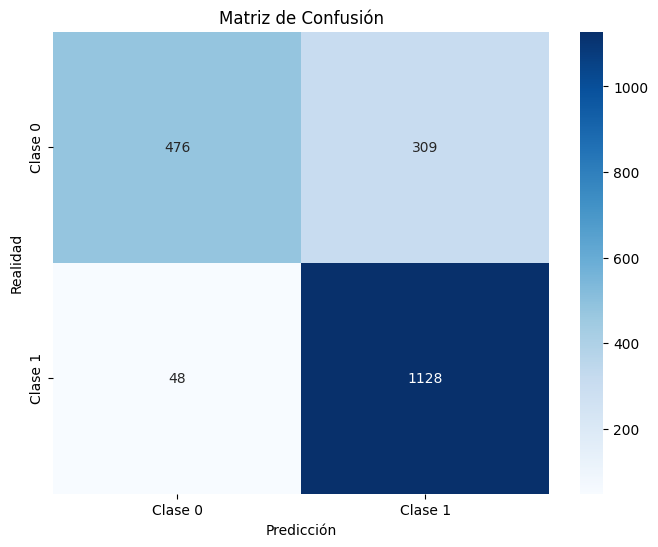


Características más importantes:
                  feature  importance
77        team2_max_spatk    0.040329
86        team2_avg_speed    0.039606
12  diff_type_grass_count    0.031349
74        team2_avg_spatk    0.029043
61       team1_avg_attack    0.027529
55           team1_avg_hp    0.026795
79        team1_avg_spdef    0.024730
89        team2_max_speed    0.024555
56           team2_avg_hp    0.024522
62       team2_avg_attack    0.024299

Sugerencias para mejorar el equipo:
- Considerar mejorar el HP del equipo (actual: 0.21)
- Considerar mejorar el DEFENSE del equipo (actual: 0.25)


In [ ]:
import pandas as pd

X, y = prepare_battle_features(equipos_df, combats)
model, scaler, feature_importance = train_battle_predictor(X, y)

team_index = 0
team_analysis = analyze_team(equipos_df.iloc[team_index], feature_importance)
print("\nSugerencias para mejorar el equipo:")
for suggestion in team_analysis:
    print(f"- {suggestion}")

def predict_battle(team1_idx, team2_idx, teams_df, model, scaler):
    team1_idx-=1
    team2_idx-=1
    temp_battle = pd.DataFrame([{'first': team1_idx, 'second': team2_idx}])
    X_battle, _ = prepare_battle_features(teams_df, temp_battle)
    X_battle_scaled = scaler.transform(X_battle)

    prediction = model.predict(X_battle_scaled)[0]
    probs = model.predict_proba(X_battle_scaled)[0]

    return {
        'winner': 1+(team1_idx if prediction == 0 else team2_idx),
        'probability': probs.max(),
        'team1_prob': probs[0],
        'team2_prob': probs[1]
    }


In [ ]:
combats

,first,second,winner
0,1,1,1
1,1,2,0
2,1,3,1
3,1,4,0
4,1,5,0
...,...,...,...
9995,100,96,1
9996,100,97,1
9997,100,98,1
9998,100,99,1


In [ ]:
result = predict_battle(1,2, equipos_df, model, scaler)
print(f"\nPredicción de batalla:")
print(f"Ganador predicho: Equipo {result['winner']}")
print(f"Probabilidad: {result['probability']:.2%}")

Error procesando batalla 0: 'winner'

Predicción de batalla:
Ganador predicho: Equipo 2
Probabilidad: 72.83%


In [ ]:
def generate_team_dataframe(pokemon_df_encoded, team_ids):
    # Lista para almacenar las columnas en orden específico
    column_order = ["#", "0", "1", "2", "3", "4", "5"]
    team_data = {"#": len(team_ids)}

    # Añadir los IDs del equipo
    for idx, pokemon_id in enumerate(team_ids):
        team_data[str(idx)] = pokemon_id

    # Procesar cada Pokémon y agregar sus datos al equipo
    for i, pokemon_id in enumerate(team_ids):
        # Filtrar el Pokémon por su ID
        pokemon_row = pokemon_df_encoded[pokemon_df_encoded["#"] == pokemon_id]
        if pokemon_row.empty:
            print(f"Advertencia: El Pokémon con ID {pokemon_id} no se encontró en el dataset.")
            continue
        pokemon_row = pokemon_row.iloc[0]  # Seleccionar la primera fila si hay duplicados

        # Agregar datos renombrados
        for col in pokemon_df_encoded.columns:
            if col.startswith("Type") or col in ["Name", "HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed", "Legendary"]:
                team_data[f"{col}_P{i}"] = pokemon_row[col]

    final_df = pd.DataFrame([team_data])

    # Agregar las columnas de tipo dinámicamente al orden
    for i in range(len(team_ids)):
        type_cols = [col for col in pokemon_df_encoded.columns if col.startswith("Type")]
        stat_cols = ["#_P", "Name_P", "HP_P", "Attack_P", "Defense_P", "SpAtk_P", "SpDef_P", "Speed_P", "Legendary_P"]
        column_order += [f"{stat}{i}" for stat in stat_cols] + [f"{type_col}_P{i}" for type_col in type_cols]

    final_df = final_df.reindex(columns=column_order)

    final_df['#'] = final_df['#'].astype(str)

    return final_df

# Ejemplo de uso
team_ids = [1, 4, 7, 25, 50, 132]  # IDs de Pokémon para el equipo
equipo_generado = generate_team_dataframe(pokemon_df_encoded, team_ids)

# Imprimir el equipo generado
print(equipo_generado)
equipo_generado[[f'Name_P{i}' for i in range(6)]].head()


   #  0  1  2   3   4    5  #_P0    Name_P0     HP_P0  ...  Type 2_Ghost_P5  \
0  6  1  4  7  25  50  132   NaN  Bulbasaur  0.176471  ...            False   

   Type 2_Grass_P5  Type 2_Ground_P5  Type 2_Ice_P5  Type 2_Normal_P5  \
0            False             False          False             False   

   Type 2_Poison_P5  Type 2_Psychic_P5  Type 2_Rock_P5  Type 2_Steel_P5  \
0             False              False           False            False   

   Type 2_Water_P5  
0            False  

[1 rows x 277 columns]


,Name_P0,Name_P1,Name_P2,Name_P3,Name_P4,Name_P5
0,Bulbasaur,Mega Venusaur,Charizard,Rattata,Gloom,Mr. Mime


In [ ]:
analyze_team(equipo_generado.iloc[0], feature_importance)

['Considerar mejorar el HP del equipo (actual: 0.22)',
 'Considerar mejorar el DEFENSE del equipo (actual: 0.30)',
 'Considerar reducir la cantidad de Pokémon tipo GRASS (actual: 3)']

PEQUEÑA PRUEBA DE INPUT

In [ ]:
# Ejemplo de uso
team_ids = [5, 19, 7, 28, 32, 152]  # IDs de Pokémon para el equipo
equipo_generado_2 = generate_team_dataframe(pokemon_df_encoded, team_ids)


In [ ]:
analyze_team(equipo_generado_2.iloc[0], feature_importance)

['Considerar mejorar el HP del equipo (actual: 0.22)',
 'Considerar mejorar el DEFENSE del equipo (actual: 0.27)']

In [ ]:
result = predict_battle(1,2, equipos_df, model, scaler)


   #  0   1  2   3   4    5  #_P0     Name_P0     HP_P0  ...  Type 2_Ghost_P5  \
0  6  5  19  7  28  32  152   NaN  Charmander  0.152941  ...            False   

   Type 2_Grass_P5  Type 2_Ground_P5  Type 2_Ice_P5  Type 2_Normal_P5  \
0            False             False          False             False   

   Type 2_Poison_P5  Type 2_Psychic_P5  Type 2_Rock_P5  Type 2_Steel_P5  \
0             False              False           False            False   

   Type 2_Water_P5  
0             True  

[1 rows x 277 columns]
